# Image Classfication using CNN's and Transfer Learning

### Import modules

## Reading data

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import os
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib 

from keras.utils import to_categorical

Using TensorFlow backend.


Using matplotlib backend: TkAgg


In [2]:
print(os.getcwd())
print(os.path.basename('__file__'))
print (os.path.abspath('__file__'))
print (os.path.dirname('__file__'))

D:\DL\Image price intelligence\New4Oct19
__file__
D:\DL\Image price intelligence\New4Oct19\__file__



In [15]:
print (globals())
print (__file__)

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', '# Importing the Keras libraries and packages\nfrom keras.models import Sequential\nfrom keras.layers import Conv2D\nfrom keras.layers import MaxPooling2D\nfrom keras.layers import Flatten\nfrom keras.layers import Dense\nimport os', 'os.path.dirname', "script_dir = os.path.dirname(__file__)\ntraining_set_path = os.path.join(script_dir, 'D:\\DL\\Image price intelligence\\TestImagesForImageComparison 1')", "# Initialising the CNN\nclassifier = Sequential()\n\n# Step 1 - Convolution\nclassifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))\n\n# Step 2 - Pooling\nclassifier.add(MaxPooling2D(pool_size=(2, 2)))\n\n# Adding a second convolutional layer\nclassifier.add(Conv2D(32, (3, 3), activation='relu')

NameError: name '__file__' is not defined

In [3]:
pwd

'D:\\DL\\Image price intelligence\\New4Oct19'

In [4]:
script_dir = os.path.dirname('__file__')
training_set_path = os.path.join(script_dir, '.\Train')

In [5]:
training_set_path

'.\\Train'

In [6]:
val_set_path = os.path.join(script_dir, '.\Val')

In [7]:
val_set_path

'.\\Val'

In [ ]:
import Image
for i in 
im = Image.open("infile.png")
im.save("outfile.jpg")

In [15]:
file_test_path =r'D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Final\2 crs'#os.path.join(script_dir, '.\prediction dataset')

In [14]:
script_dir

''

In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img = load_img('train/elephants/adventure-1822636_640.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 300, 300, 3)
x.shape

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir='preview', save_prefix='el', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [8]:
 #MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(94))
model.add(Activation('softmax'))
# COMPILE
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [48]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=94, activation='softmax'))

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Part 2 - Fitting the CNN to the images

# this is the augmentation configuration we will use for training
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [10]:
# this is a generator that will read pictures found in subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
training_set = train_datagen.flow_from_directory(training_set_path,  # this is the target directory
                                                 target_size=(300, 300),# all images will be resized to 300x300
                                                 batch_size=16,
                                                 class_mode='categorical')#since we use categorical_crossentropy loss, we need categorical labels

Found 157 images belonging to 94 classes.


In [11]:

# this is the augmentation configuration we will use for testing:
# only rescaling
val_datagen = ImageDataGenerator(rescale=1. / 255)
val_set = val_datagen.flow_from_directory(val_set_path,
                                            target_size=(300, 300),
                                            batch_size=16,
                                            class_mode='categorical')

Found 102 images belonging to 94 classes.


In [12]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_set =test_datagen.flow_from_directory(file_test_path,
                                            target_size=(300, 300),
                                            batch_size=16,
                                            class_mode='categorical')

NameError: name 'file_test_path' is not defined

In [65]:
#TRAINING
batch_size= 16
history= model.fit_generator(
        training_set,
        steps_per_epoch=400 // batch_size,
        epochs=50,
        validation_data=val_set,
        validation_steps=160 // batch_size)

model.save_weights('50_epochs.h5')  # always save your weights after training or during training

Epoch 1/50
25/25 [==============================] - 60s 2s/step - loss: 1.0164 - acc: 0.7404 - val_loss: 0.2629 - val_acc: 0.9421
Epoch 2/50
25/25 [==============================] - 58s 2s/step - loss: 0.7369 - acc: 0.8059 - val_loss: 0.2858 - val_acc: 0.9515
Epoch 3/50
25/25 [==============================] - 58s 2s/step - loss: 0.7332 - acc: 0.8145 - val_loss: 0.1252 - val_acc: 0.9669
Epoch 4/50
25/25 [==============================] - 58s 2s/step - loss: 0.5639 - acc: 0.8477 - val_loss: 0.1210 - val_acc: 0.9664
Epoch 5/50
25/25 [==============================] - 58s 2s/step - loss: 0.5308 - acc: 0.8535 - val_loss: 0.1290 - val_acc: 0.9669
Epoch 6/50
25/25 [==============================] - 58s 2s/step - loss: 0.5077 - acc: 0.8670 - val_loss: 0.1407 - val_acc: 0.9701
Epoch 7/50
25/25 [==============================] - 57s 2s/step - loss: 0.4139 - acc: 0.8879 - val_loss: 0.1269 - val_acc: 0.9752
Epoch 8/50
25/25 [==============================] - 57s 2s/step - loss: 0.3912 - acc: 0.89

In [13]:
model.load_weights('50_epochs.h5')

In [ ]:
model.save('products09_transferlearning.h5')
model.save_weights('products09_transferlearning_weights.h5')

In [68]:
model.predict(file_test_path)

AttributeError: 'str' object has no attribute 'ndim'

In [49]:
from keras import callbacks
#early_stop will <monitor> a metric and if it doesn't decrease by <min_delta> in <patience> epochs then train will stop
early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
history = classifier.fit_generator(training_set,
                         steps_per_epoch=200,
                         epochs=50,
                         validation_data=val_set,
                                                 validation_steps=100,callbacks= [early_stop])

Epoch 1/50
200/200 [==============================] - 55s 276ms/step - loss: 1.3237 - acc: 0.7096 - val_loss: 0.0648 - val_acc: 0.9710
Epoch 2/50
200/200 [==============================] - 52s 261ms/step - loss: 0.1052 - acc: 0.9727 - val_loss: 0.1048 - val_acc: 0.9608
Epoch 3/50
200/200 [==============================] - 52s 261ms/step - loss: 0.0735 - acc: 0.9786 - val_loss: 0.0557 - val_acc: 0.9702
Epoch 4/50
200/200 [==============================] - 52s 261ms/step - loss: 0.0539 - acc: 0.9803 - val_loss: 0.0721 - val_acc: 0.9714
Epoch 5/50
200/200 [==============================] - 52s 261ms/step - loss: 0.0550 - acc: 0.9786 - val_loss: 0.0610 - val_acc: 0.9698
Epoch 6/50
200/200 [==============================] - 52s 262ms/step - loss: 0.0509 - acc: 0.9784 - val_loss: 0.0794 - val_acc: 0.9604
Epoch 7/50
200/200 [==============================] - 52s 261ms/step - loss: 0.0436 - acc: 0.9800 - val_loss: 0.0793 - val_acc: 0.9616
Epoch 8/50
200/200 [==============================] - 5

In [56]:
classifier.evaluate

<bound method Sequential.predict_classes of <keras.engine.sequential.Sequential object at 0x000002C500C05A20>>

In [ ]:
from utils import classification_report
y_true = np.concatenate([np.argmax(test_generator[i][1], axis=1) for i in range(test_generator.n)])
y_pred =  np.argmax(model.predict_generator(test_generator, steps=test_generator.n), axis=1)
classification_report(y_true, y_pred)

In [15]:
import split_folders

In [37]:
batch_size = 32
score,acc = classifier.evaluate(x_test_pad, test_y, verbose = 1, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

NameError: name 'x_test_pad' is not defined

In [19]:
##for deeper one ths is the plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
score,acc = classifier.evaluate(x_test_pad, test_y, verbose = 1, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

In [40]:
classifier.fit_generator(training_set,
                         steps_per_epoch=200,
                         epochs=10,
                         validation_data=val_set,
                         validation_steps=100)

Epoch 1/10
 21/200 [==>...........................] - ETA: 32s - loss: 0.0237 - acc: 0.9930

KeyboardInterrupt: 

prediction_datagen = ImageDataGenerator(rescale=1. / 255)
prediction_set = prediction_datagen.flow_from_directory(file_test_path,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

In [10]:
from skimage.io import imread_collection

#your path 
col_dir = 'prediction dataset/*.jpg'

#creating a collection with the available images
col = imread_collection(col_dir)

In [ ]:
prediction = 

In [14]:
length = len(col)
length

11

In [16]:
#check image shape

for i in range(11):
    print(col[i].shape)

(140, 140, 3)
(140, 140, 3)
(452, 460, 3)
(200, 200, 3)
(225, 225, 3)
(259, 194, 3)
(225, 225, 3)
(225, 225, 3)
(257, 196, 3)
(183, 275, 3)
(429, 499, 3)


In [ ]:
classifier.predict_proba

In [57]:
print(training_set.classes)

[ 0  1  2  2  3  3  4  4  5  6  6  7  8  9  9 10 11 12 12 13 13 14 15 15
 16 16 17 18 18 19 20 21 22 22 22 23 24 24 25 26 27 28 29 29 30 30 31 32
 33 34 35 35 36 37 37 38 39 40 41 41 41 41 41 41 42 42 42 42 43 43 43 44
 44 45 46 46 47 47 47 48 48 49 49 50 51 52 53 54 54 55 56 57 58 59 60 61
 61 61 62 62 63 63 63 63 63 64 65 65 66 67 68 68 69 69 70 70 71 71 72 72
 72 73 73 74 75 75 76 76 76 76 76 76 77 78 78 79 79 80 80 81 82 82 83 84
 85 85 86 87 88 89 90 90 91 92 92 93]


In [58]:
print(test_set.classes)

NameError: name 'test_set' is not defined

In [87]:
from scipy import ndimage, misc
import PIL
image_resized = misc.imresize(col, (64, 64,3))           

C:\Users\vlakshmi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: 'arr' does not have a suitable array shape for any mode.

In [20]:
class_values=[k for k in training_set.class_indices.values()]

In [21]:
class_names=[k for k in training_set.class_indices.keys()]

In [57]:
[training_set.class_indices.keys()]

[dict_keys(['1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9'])]

In [54]:
class_names

['1049934',
 '1050356',
 '1050371',
 '1057294',
 '1074895',
 '1082642',
 '1082795',
 '1096031',
 '1096403',
 '1106428',
 '1186658',
 '1260132',
 '1292741',
 '1311850',
 '1319382',
 '1329300',
 '1335919',
 '1336018',
 '1336121',
 '1401620',
 '1401670',
 '1409856',
 '1434736',
 '1461327',
 '1476694',
 '448319',
 '448350',
 '451578',
 '463801',
 '518244',
 '518481',
 '518592',
 '541687',
 '541736',
 '543983',
 '544219',
 '544523',
 '545063',
 '552872',
 '579435',
 '581957',
 '582759',
 '605829',
 '606221',
 '624267',
 '627424',
 '647399',
 '647401',
 '657820',
 '665136',
 '672457',
 '678736',
 '680414',
 '681989',
 '709335',
 '709338',
 '709649',
 '709701',
 '717875',
 '720379',
 '731323',
 '820837',
 '833102',
 '880211',
 '880269',
 '898018',
 '904732',
 '909724',
 '912008']

In [58]:

for testing_img in os.listdir('Classification 11\Testing'):
    print(testing_img)

116561011.jpg
17649385.JPG
20175362.jpeg
34524344.jpeg
491650632.jpg
5000281020761.jpg
501127300.JPG
5011273000135_L.jpeg
5051594001932.jpeg
5054267003378_T1.jpg
540866.JPG
8000070038868_L.jpeg
98326380734.JPG


In [36]:
r'D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Train\\'+class_names[result.argmax()]+'\\'+'after_testing_'+testing_img

'D:\\DL\\Image price intelligence\\New4Oct19\\clust\\SIM5\\Train1082642\\after_testing_1303147.jpg'

In [38]:
save_img(r'D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Train\\'+class_names[result.argmax()]+'\\'+'after_testing_'+testing_img,img)

In [41]:
os.listdir(r'D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Train\\'+class_names[result.argmax()])

['156571.jpg',
 '9974000.jpg.jpg',
 '9974020.jpg',
 'after_testing_1303147.jpg',
 'after_testing_9974001.jpg.jpg']

1303147.jpg
**********
Moving image: 1303147.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\1401620


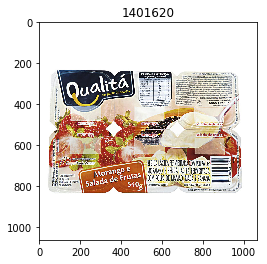

9970578.jpg
**********
Moving image: 9970578.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\518244


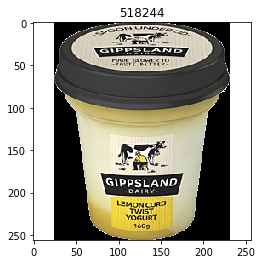

9972242.jpg
**********
Moving image: 9972242.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


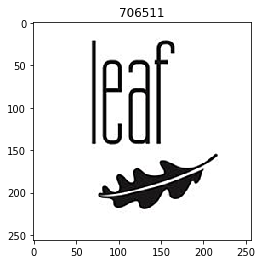

9972246.jpg
**********
Moving image: 9972246.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


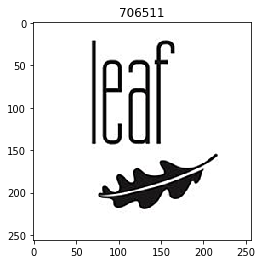

9972249.jpg
**********
Moving image: 9972249.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


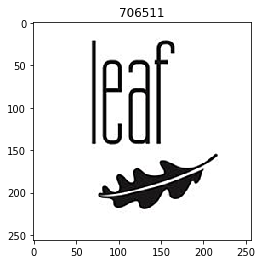

9972252.jpg
**********
Moving image: 9972252.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


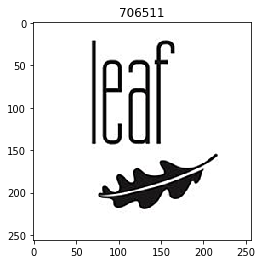

9972253.jpg
**********
Moving image: 9972253.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


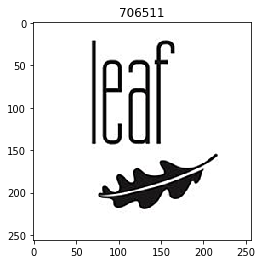

9972256.jpg
**********
Moving image: 9972256.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


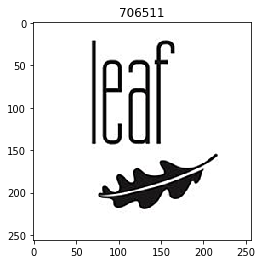

9972258.jpg
**********
Moving image: 9972258.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


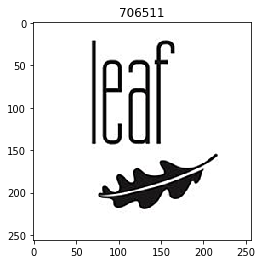

9972259.jpg
**********
Moving image: 9972259.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


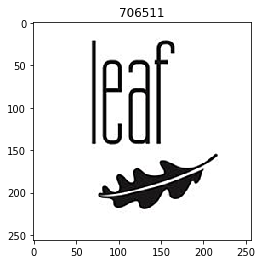

9972260.jpg
**********
Moving image: 9972260.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


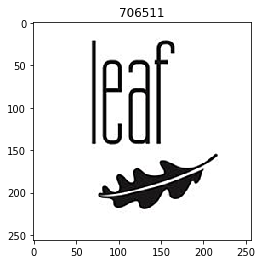

9972263.jpg
**********
Moving image: 9972263.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


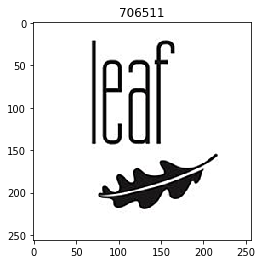

9972264.jpg
**********
Moving image: 9972264.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


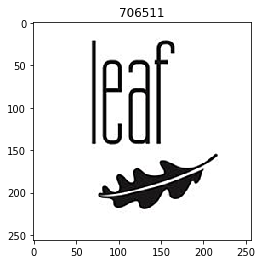

9972265.jpg
**********
Moving image: 9972265.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


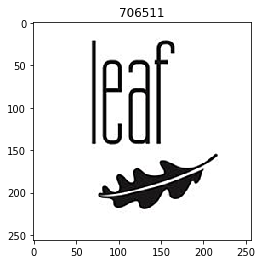

9972266.jpg
**********
Moving image: 9972266.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


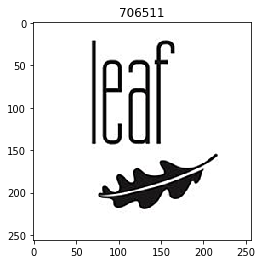

9972267.jpg
**********
Moving image: 9972267.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


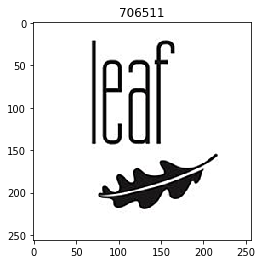

9972269.jpg
**********
Moving image: 9972269.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


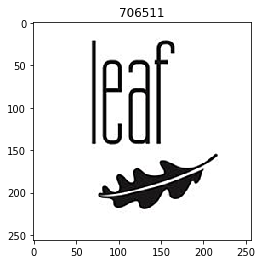

9972270.jpg
**********
Moving image: 9972270.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\706511


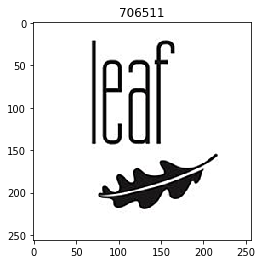

9973963.jpg
**********
Moving image: 9973963.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\545063


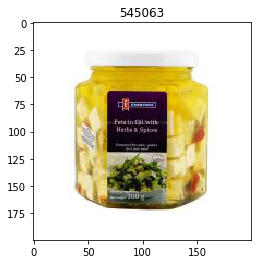

9974000.jpg.jpg
**********
Moving image: 9974000.jpg.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\518244


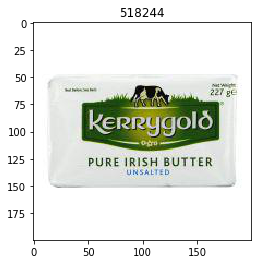

9974001.jpg.jpg
**********
Moving image: 9974001.jpg.jpg
To:D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\1082642


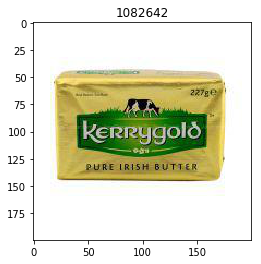

In [47]:
# Part 3 - Making new predictions
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import save_img
import os
#plt.figure(figsize=(20,20))

for testing_img in os.listdir(r'D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Final\2 crs'):
    #D:\DL\Image price intelligence\Classification 11\Testing
    test_image = image.load_img(r"D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Final\2 crs\\"+testing_img,target_size= (300,300))
    img=mpimg.imread(r"D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Final\2 crs\\"+testing_img)
    img = img[:,:,:3]
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict_proba(test_image)
    print(testing_img)
    final_image_name='after_testing_'+testing_img
    target_dir=os.listdir(r'D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\'+class_names[result.argmax()])
    if(os.path.exists(r'D:\DL\Image price intelligence\New4Oct19\Results\\'+class_names[result.argmax()])):
        save_img(r'D:\DL\Image price intelligence\New4Oct19\Results\\'+class_names[result.argmax()]+'\\'+testing_img+'.jpg',img)
        if (testing_img not in target_dir) and (final_image_name not in target_dir):
            save_img(r'D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\'+class_names[result.argmax()]+'\\'+final_image_name,img)
            print('*'*10)
            print('Moving image:',testing_img)
            print('To:'+r'D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\'+class_names[result.argmax()])
        else:
            print("Image already exists")
    else:
        os.makedirs(r'D:\DL\Image price intelligence\New4Oct19\Results\\'+class_names[result.argmax()])
        save_img(r'D:\DL\Image price intelligence\New4Oct19\Results\\'+class_names[result.argmax()]+'\\'+testing_img+'.jpg',img)
        if (testing_img not in target_dir) and (final_image_name not in target_dir): 
            save_img(r'D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\'+class_names[result.argmax()]+'\\'+final_image_name,img)
            print('*'*10)
            print('Moving image:',testing_img)
            print('To:'+r'D:\DL\Image price intelligence\New4Oct19\clust\SIM5\Dairy Food\\'+class_names[result.argmax()])
        else:
            print("Image already exists")
    #plt.subplot(4,3,testing_img)
    plt.imshow(img)
    plt.title(class_names[result.argmax()])
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [95]:
import pandas as pd
pd.isnull(image_classes[8])

KeyError: 8

In [96]:
image_classes.has_key(key)

AttributeError: 'dict' object has no attribute 'has_key'

In [86]:
i=0
image_classes=dict()
for Test_img in os.listdir(r'D:\DL\Image price intelligence\New4Oct19\2Test'):
    #D:\DL\Image price intelligence\Classification 11\2Test
    test_image = image.load_img(r"D:\DL\Image price intelligence\New4Oct19\2Test\\"+Test_img,target_size= (64,64))
    img=mpimg.imread(r"D:\DL\Image price intelligence\New4Oct19\2Test\\"+Test_img)
    img = img[:,:,:3]
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = classifier.predict_proba(test_image)
    if 
    image_classes[np.argmax(result)]=
    print(result)
    i=i+1
    if(i==21):
        print(result)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 2.991562e-28
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 9.999851e-01 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 1.485458e-05 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.5483643e-29 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [83]:
result

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [79]:
os.listdir(r'D:\DL\Image price intelligence\New4Oct19\Testing')

['1217569.jpg',
 '1297033.jpg',
 '1297034.jpg',
 '1298155.jpg',
 '1298157.jpg',
 '1298192.png',
 '1300233.png',
 '1300253.png',
 '1300259.jpg',
 '1303056.jpg',
 '1303078.jpg',
 '1303087.jpg',
 '1303088.png',
 '1303095.jpg',
 '1303096.jpg',
 '1303103.jpg',
 '1303114.jpg',
 '1303117.jpg',
 '1303124.jpg',
 '1303126.jpg',
 '1303140.jpg',
 '1303147.jpg',
 '1303156.jpg',
 '1303157.jpg',
 '1303203.jpg',
 '1303210.jpg',
 '1303212.jpg',
 '1475584.jpg',
 '1475784.jpg',
 '1475916.jpg',
 '1507726.jpg',
 '1507742.png',
 '1507788.jpg',
 '2117739.jpg',
 '2117769.jpg',
 '2117888.jpg',
 '4467616.jpg',
 '4480021.png',
 '4481304.jpg',
 '8298250.jpg',
 '8298425.png',
 '8298761.jpg',
 '8298875.jpg',
 '8299061.jpg',
 '8299227.jpg',
 '8299723.jpg',
 '8299852.png',
 '8299954.jpg',
 '8300123.jpg',
 '8300190.jpg',
 '8300481.jpg',
 '8300496.jpg',
 '8300821.jpg',
 '8301201.jpg',
 '8301643.jpg',
 '8301664.jpg',
 '8301671.jpg',
 '8301675.jpg',
 '8301689.jpg',
 '8302284.png',
 '8302579.png',
 '8302580.png',
 '830260

In [61]:
testing_img

'1217569'

In [ ]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,5)
for i in range(5):
    ax[i].imshow(yourimage)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def grid_display(list_of_images, list_of_titles=[], no_of_columns=2, figsize=(10,10)):

    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        plt.imshow(list_of_images[i])
        plt.axis('off')
        if len(list_of_titles) >= len(list_of_images):
            plt.title(list_of_titles[i])
grid_display(images, titles, 3, (10,10))

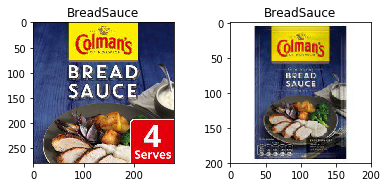

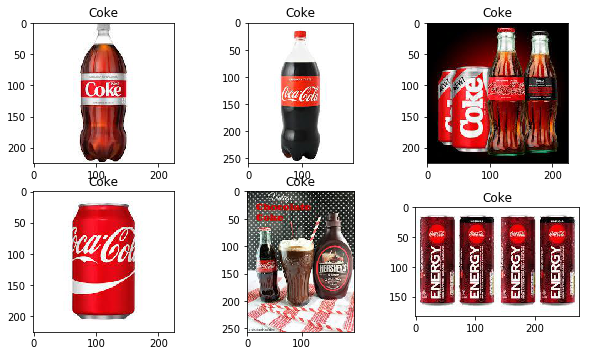

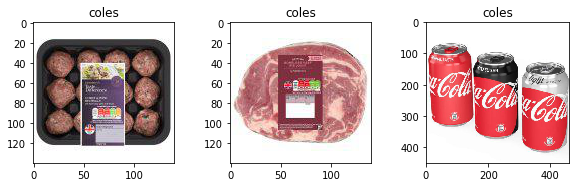

In [118]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
test_results_file_path='D:\\DL\\Image price intelligence\\Test Results\\'
for directory in os.listdir(test_results_file_path):
    i=0
    fig = figure(figsize=(10,15))
    num_of_files=len(os.listdir(test_results_file_path+'\\'+directory))
    for image in os.listdir(test_results_file_path+'\\'+directory):
        #a=fig.add_subplot(1,num_of_files,i+1)
        #plt.subplots_adjust(wspace=2, hspace=5)
        plt.subplot(5,3,i+1)
        result_image=mpimg.imread(test_results_file_path+'\\'+directory+'\\'+image)
        plt.imshow(result_image)
        plt.title(directory)
        i+=1
        

In [ ]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImagesHorizontally(list_of_files):
    fig = figure()
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(1,number_of_files,i+1)
        image = imread(list_of_files[i])
        imshow(image,cmap='Greys_r')
        axis('off')

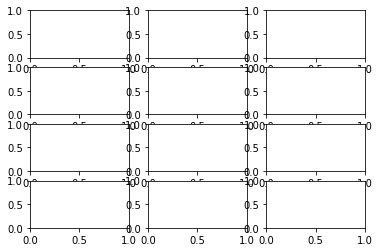

In [72]:
for i in range(12):
    plt.subplot(4, 3, i+1)
    #plt.text(0.5, 0.5, str((2, 3, i)),
             #fontsize=18, ha='center')

In [41]:
predictions = {
    "classes": result.argmax(),
    "probabilities": classifier.softmax(logits, name="softmax_tensor")
}

AttributeError: 'Sequential' object has no attribute 'softmax'

In [ ]:
if mode == tf.estimator.ModeKeys.PREDICT:
  return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

## Useful

In [ ]:
from pathlib import Path

disk_dir = Path("data/disk/")
lmdb_dir = Path("data/lmdb/")
hdf5_dir = Path("data/hdf5/")

In [ ]:
disk_dir.mkdir(parents=True, exist_ok=True)
lmdb_dir.mkdir(parents=True, exist_ok=True)
hdf5_dir.mkdir(parents=True, exist_ok=True)

In [ ]:
from PIL import Image
import csv

def store_single_disk(image, image_id, label):
    """ Stores a single image as a .png file on disk.
        Parameters:
        ---------------
        image       image array, (32, 32, 3) to be stored
        image_id    integer unique ID for image
        label       image label
    """
    Image.fromarray(image).save(disk_dir / f"{image_id}.png")

    with open(disk_dir / f"{image_id}.csv", "wt") as csvfile:
        writer = csv.writer(
            csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL
        )
        writer.writerow([label])

In [42]:
classifier.save('products09_transferlearning.h5')
classifier.save_weights('products09_transferlearning_weights.h5')

ImportError: `save_model` requires h5py.

In [124]:

classes = ('bottles','bacon','dolmo','always fresh','masterfoods','bega','nutella',
           'cadbury','lindt','pods','m&m','fun to share','kettle','smiths','peckish','latina fresh','fetta',
          'wattle vally')

In [16]:
ipynb-py-convert cargotic_careers.py  cargotic_careers.ipynb

SyntaxError: invalid syntax (<ipython-input-16-fb297729920e>, line 1)

In [ ]:
ipynb-py-convert examples/plot.py examples/plot.ipynb

In [25]:
ipynb-py-convert new/cargotic_careers.py new/cargotic_careers.ipynb

SyntaxError: invalid syntax (<ipython-input-25-254c12c0e117>, line 1)

In [21]:
ipynb-py-convert convesn/added_from_net_11_label_CNN_Image_Classification.ipynb convesn/added_from_net_11_label_CNN_Image_Classification.py

SyntaxError: invalid syntax (<ipython-input-21-3b134353b6ca>, line 1)

In [19]:
pwd

'D:\\DL\\Image price intelligence\\New4Oct19'